In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree._export import plot_tree


In [ ]:
# Function to import the dataset
def importdata():
	balance_data = pd.read_csv(
		'https://archive.ics.uci.edu/ml/machine-learning-' +
		'databases/balance-scale/balance-scale.data',
		sep=',', header=None)

	# Displaying dataset information
	print("Dataset Length: ", len(balance_data))
	print("Dataset Shape: ", balance_data.shape)
	print("Dataset: ", balance_data.head())

	return balance_data


In [ ]:
# Function to split the dataset into features and target variables
def splitdataset(balance_data):

	# Separating the target variable
	X = balance_data.values[:, 1:5]
	Y = balance_data.values[:, 0]

	# Splitting the dataset into train and test
	X_train, X_test, y_train, y_test = train_test_split(
		X, Y, test_size=0.3, random_state=100)

	return X, Y, X_train, X_test, y_train, y_test


In [ ]:
# Function to split the dataset into features and target variables
def splitdataset(balance_data):

	# Separating the target variable
	X = balance_data.values[:, 1:5]
	Y = balance_data.values[:, 0]

	# Splitting the dataset into train and test
	X_train, X_test, y_train, y_test = train_test_split(
		X, Y, test_size=0.3, random_state=100)

	return X, Y, X_train, X_test, y_train, y_test


In [ ]:
def train_using_gini(X_train, X_test, y_train):

	# Creating the classifier object
	clf_gini = DecisionTreeClassifier(criterion="gini",
									random_state=100, max_depth=3, min_samples_leaf=5)

	# Performing training
	clf_gini.fit(X_train, y_train)
	return clf_gini


In [ ]:
def train_using_entropy(X_train, X_test, y_train):

	# Decision tree with entropy
	clf_entropy = DecisionTreeClassifier(
		criterion="entropy", random_state=100,
		max_depth=3, min_samples_leaf=5)

	# Performing training
	clf_entropy.fit(X_train, y_train)
	return clf_entropy


In [ ]:
# Function to make predictions
def prediction(X_test, clf_object):
	y_pred = clf_object.predict(X_test)
	print("Predicted values:")
	print(y_pred)
	return y_pred

# Placeholder function for cal_accuracy
def cal_accuracy(y_test, y_pred):
	print("Confusion Matrix: ",
		confusion_matrix(y_test, y_pred))
	print("Accuracy : ",
		accuracy_score(y_test, y_pred)*100)
	print("Report : ",
		classification_report(y_test, y_pred))


In [ ]:
# Function to plot the decision tree
def plot_decision_tree(clf_object, feature_names, class_names):
	plt.figure(figsize=(15, 10))
	plot_tree(clf_object, filled=True, feature_names=feature_names, class_names=class_names, rounded=True)
	plt.show()


Dataset Length:  625
Dataset Shape:  (625, 5)
Dataset:     0  1  2  3  4
0  B  1  1  1  1
1  R  1  1  1  2
2  R  1  1  1  3
3  R  1  1  1  4
4  R  1  1  1  5


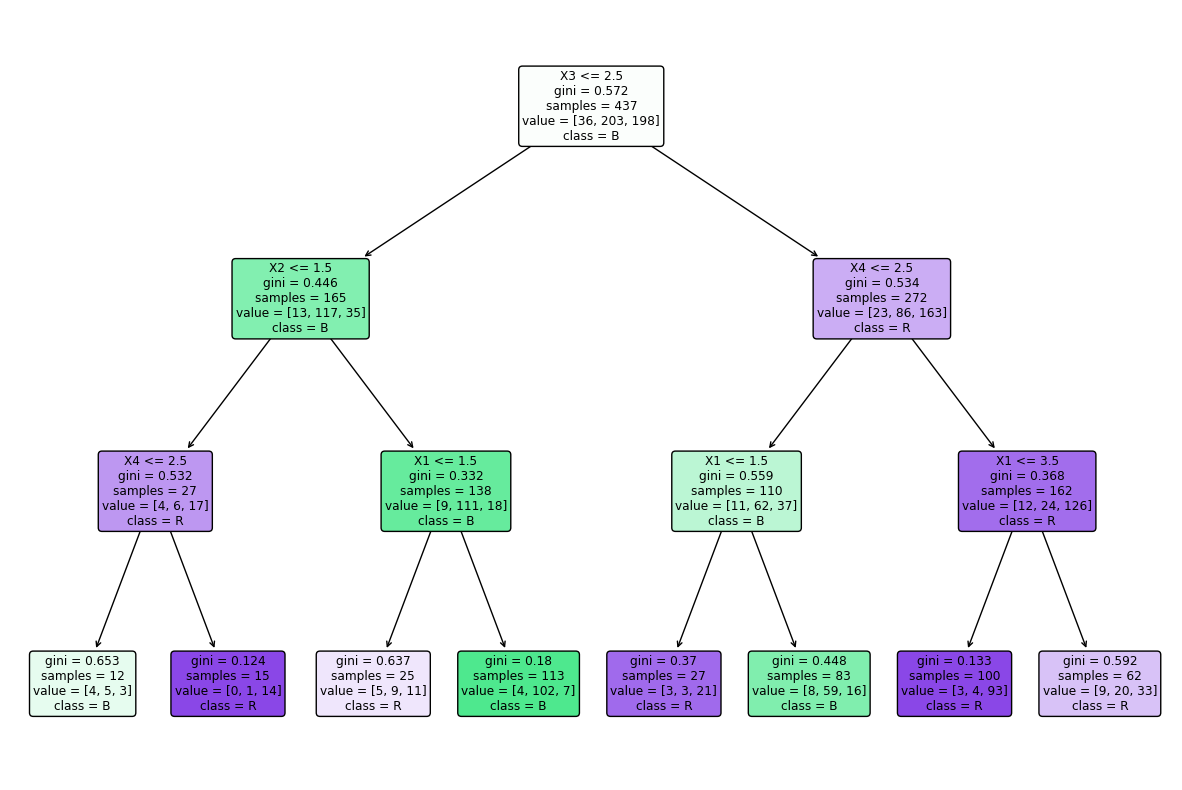

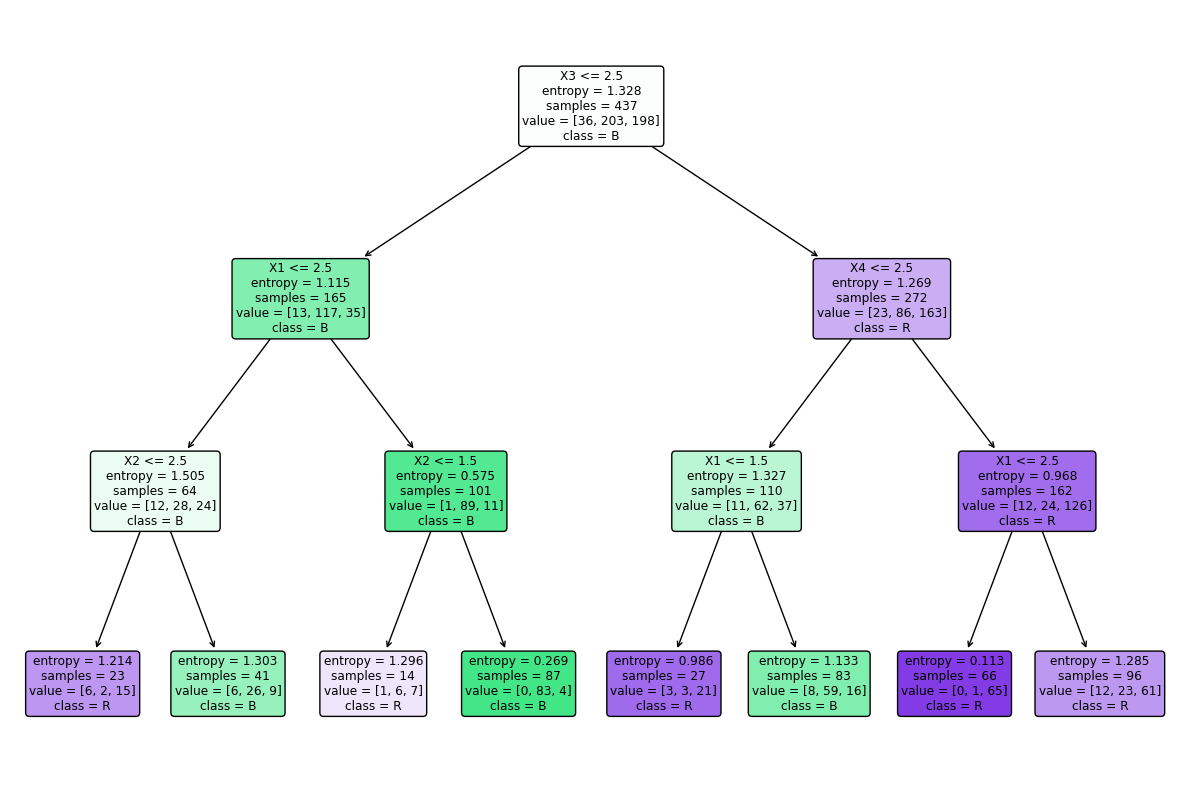

In [ ]:
if __name__ == "__main__":
	data = importdata()
	X, Y, X_train, X_test, y_train, y_test = splitdataset(data)

	clf_gini = train_using_gini(X_train, X_test, y_train)
	clf_entropy = train_using_entropy(X_train, X_test, y_train)

	# Visualizing the Decision Trees
	plot_decision_tree(clf_gini, ['X1', 'X2', 'X3', 'X4'], ['L', 'B', 'R'])
	plot_decision_tree(clf_entropy, ['X1', 'X2', 'X3', 'X4'], ['L', 'B', 'R'])
